In [6]:
# First of all ... Set random seed as my university ID
import random
random.seed(19593397)

In [7]:
# Import all the librarys needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pca import pca
import time
import math
import matplotlib.cm as cm
import scipy.cluster.hierarchy as sch
from scipy.cluster import vq 
from mpl_toolkits.axes_grid1 import ImageGrid
from scipy.stats import multivariate_normal as normal 


from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn import cluster  
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import preprocessing
from sklearn.cluster import DBSCAN
from sklearn import datasets
from sklearn.cluster import MiniBatchKMeans 
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.manifold import MDS 
from scipy.spatial.distance import squareform 
from sklearn.datasets import make_blobs, fetch_openml
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import mixture 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, Perceptron, BayesianRidge
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_auc_score, recall_score
from sklearn.svm import SVC, LinearSVC
from sklearn import model_selection, datasets, tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve
from sklearn.metrics import auc as calculate_auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score

# Import lib to plot multiple graph in one cell
# *** If not running successfully, please remove this.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'
from IPython import display
%matplotlib inline

In [8]:
#Preprocessing the dataset
# Prepocessing the data
dataframe=pd.read_csv('musicData.csv')
data=dataframe.to_numpy()
print("The unfiltered shape is:",data.shape)
data=np.delete(data, [0,1,2,-3], axis=1)


# Step 1: Transform data to fully numerical: mode and key
for i in range(len(data)):
    if data[i,9] == 'Minor':
        data[i,9] = 0
    else:
        data[i,9] = 1

arr=[0 for m in range(len(data))]
data= np.column_stack((data,arr))
data= np.column_stack((data,arr))
data= np.column_stack((data,arr))
data= np.column_stack((data,arr)) # last four columns to store binary decode of "key"

for i in range(len(data)):
    if data[i,6] == 'C':
        data[i,-1] = 0
    elif data[i,6] == 'C#':
        data[i,-1] = 1
    elif data[i,6] == 'D':
        data[i,-1] = 1
        data[i,-2] = 0
    elif data[i,6] == 'D#':
        data[i,-1] = 1
        data[i,-2] = 1
    elif data[i,6] == 'E':
        data[i,-3] = 1
    elif data[i,6] == 'E#':
        data[i,-3] = 1
        data[i,-1] = 1
    elif data[i,6] == 'F':
        data[i,-3] = 1
        data[i,-2] = 1
    elif data[i,6] == 'F#':
        data[i,-3] = 1
        data[i,-2] = 1
        data[i,-1] = 1
    elif data[i,6] == 'G':
        data[i,-4] = 1
    elif data[i,6] == 'G#':
        data[i,-4] = 1
        data[i,-1] = 1
    elif data[i,6] == 'A':
        data[i,-4] = 1
        data[i,-2] = 1
    elif data[i,6] == 'A#':
        data[i,-4] = 1
        data[i,-2] = 1
        data[i,-1] = 1
    else:
        data[i,-4] = 1
        data[i,-3] = 1

for i in range(len(data)):
    if data[i,13] == 'Alternative':
        data[i,13] = 0
    elif data[i,13] == 'Anime':
        data[i,13] = 1
    elif data[i,13] == 'Blues':
        data[i,13] = 2
    elif data[i,13] == 'Classical':
        data[i,13] = 3
    elif data[i,13] == 'Country':
        data[i,13] = 4
    elif data[i,13] == 'Electronic':
        data[i,13] = 5
    elif data[i,13] == 'Hip-Hop':
        data[i,13] = 6
    elif data[i,13] == 'Jazz':
        data[i,13] = 7
    elif data[i,13] == 'Rap':
        data[i,13] = 8
    else:
        data[i,13] = 9


# Step 2: filter the NaN data
data=np.delete(data,[10000,10001,10002,10003,10004,10005], axis=0)
#column with problem: duration & tempo
list_prob=[]
for ii in range(len(data)):
    if (data[ii,3] == -1) or (data[ii,11] == '?'):
        list_prob.append(ii)
data=np.delete(data,list_prob,axis=0)

print("The filtered shape is:",data.shape)


# Key and mode are categorical
E=[0,1,2,3,4,5,7,8,9,10,11,12,14,15,16,17]
'''
standard_scaler=StandardScaler()
X=standard_scaler.fit_transform(data[:,E])
'''

X=data[:,E]
y=data[:,13]

a = data[:3, :]
print(a)


The unfiltered shape is: (50005, 18)
The filtered shape is: (40559, 18)


'\nstandard_scaler=StandardScaler()\nX=standard_scaler.fit_transform(data[:,E])\n'

[[31.0 0.0127 0.622 218293.0 0.89 0.95 'D' 0.124 -7.042999999999999 0
  0.03 '115.00200000000001' 0.531 5 0 0 0 1]
 [28.0 0.00306 0.62 215613.0 0.755 0.0118 'G#' 0.534 -4.617 1 0.0345
  '127.994' 0.3329999999999999 5 1 0 0 1]
 [34.0 0.0254 0.774 166875.0 0.7 0.00253 'C#' 0.157 -4.498 1 0.239
  '128.014' 0.27 5 0 0 0 1]]


In [9]:
# Create the training and testing data
y_train=y
X_train=X

list_node=[0]
for k in range(1,len(data)):
    if data[k-1,13] != data[k,13]:
        list_node.append(k)
list_node.append(len(data))

index=[]
for j in range(10):
    for i in range(500):
            r=random.randint(list_node[j],list_node[j+1])
            while r in index:
                r=random.randint(list_node[j],list_node[j+1])
            index.append(r)
            #if r not in index: index.append(r)
            
y_train=np.delete(y_train,index,axis=0)
X_train=np.delete(X_train,index,axis=0)
y_test=y[index]
X_test=X[index,]
print("Training set with shape:",X_train.shape)
print("Testing set with shape:",X_test.shape)
# Due to the prepocessing of data, the total size is not 50,000, 
# so I used the similar trained-to-tested ratio to generate the data

# Do stardarization
standard_scaler=StandardScaler()
X_train=standard_scaler.fit_transform(X_train)
X_test=standard_scaler.fit_transform(X_test)


Training set with shape: (35559, 16)
Testing set with shape: (5000, 16)


PCA(whiten=True)

<BarContainer object of 16 artists>

Text(0.5, 0, 'Principal Components')

Text(0, 0.5, 'Explained variance (in decimal)')

Text(0.5, 1.0, 'Explained variance by each component (PC1, PC2, ...)')

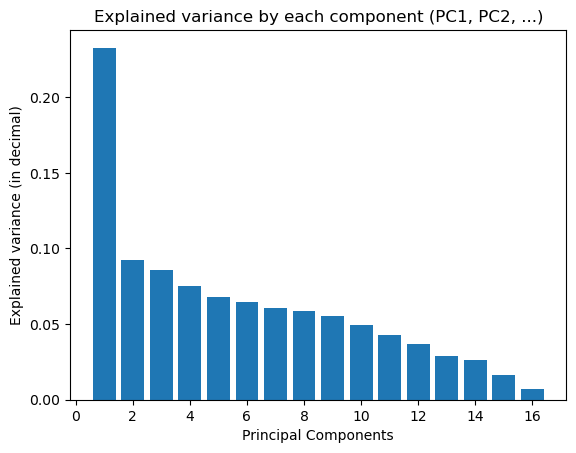

Text(0.5, 0, 'First Principal Component')

Text(0, 0.5, 'Second Principal Component')

Text(0.5, 1.0, 'PCA Scatter Plot')

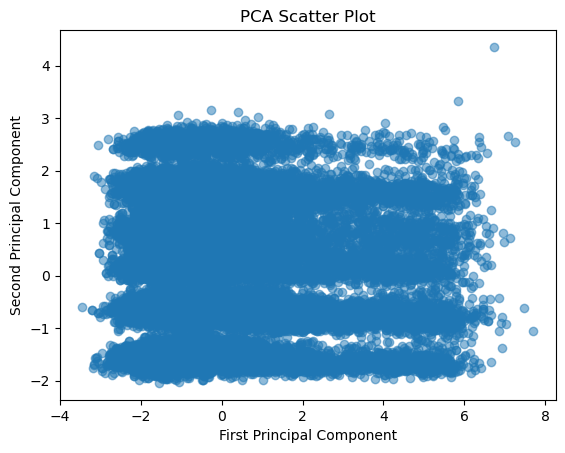

/Users/huyuang/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/huyuang/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Text(0.5, 1.0, 't-SNE plot in 2D')

Text(0.5, 0, 'Component 1')

Text(0, 0.5, 'Component 2')

The KL divergence when perplexity=30 is: 2.2007784843444824


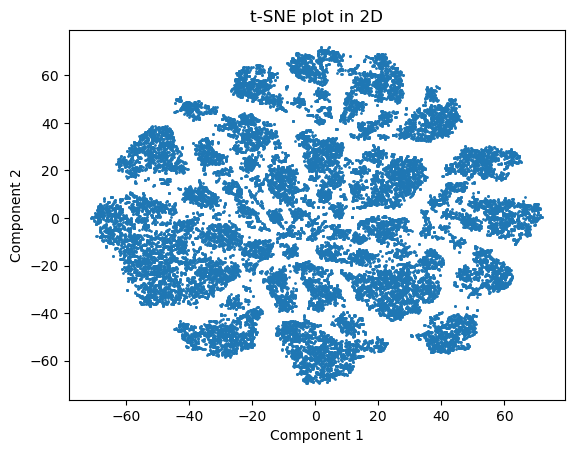

In [10]:
#Dimensionality reduction and clustering
#Dimensionality Reduction: PCA

pca1 = PCA(whiten=True)
pca1.fit(X_train)

var = pca1.explained_variance_ratio_
plt.bar(range(1, len(var) + 1), var)
plt.xlabel('Principal Components')
plt.ylabel('Explained variance (in decimal)')
plt.title('Explained variance by each component (PC1, PC2, ...)')
plt.show()

model = PCA(n_components=2)
results = model.fit_transform(X_train)

plt.scatter(results[:, 0], results[:, 1], alpha=0.5)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Scatter Plot')
plt.show()

# Dimensionality Reduction: t-SNE 
tsne=TSNE(n_components=2, perplexity=30)
X_tsne=tsne.fit_transform(X_train)
tsne_dataframe= pd.DataFrame(data=X_tsne, columns=['tsne comp. 1', 'tsne comp. 2'])

plt.scatter(tsne_dataframe.iloc[:,0], tsne_dataframe.iloc[:,1], cmap="brg", s=1)
plt.title('t-SNE plot in 2D')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

print("The KL divergence when perplexity=30 is:", tsne.kl_divergence_)


For n_clusters = 2, The average silhouette_score is: 0.44388797787372314
For n_clusters = 3, The average silhouette_score is: 0.2990792223117468
For n_clusters = 4, The average silhouette_score is: 0.2812345812287499
For n_clusters = 5, The average silhouette_score is: 0.278671894308401
For n_clusters = 6, The average silhouette_score is: 0.26565279717690626


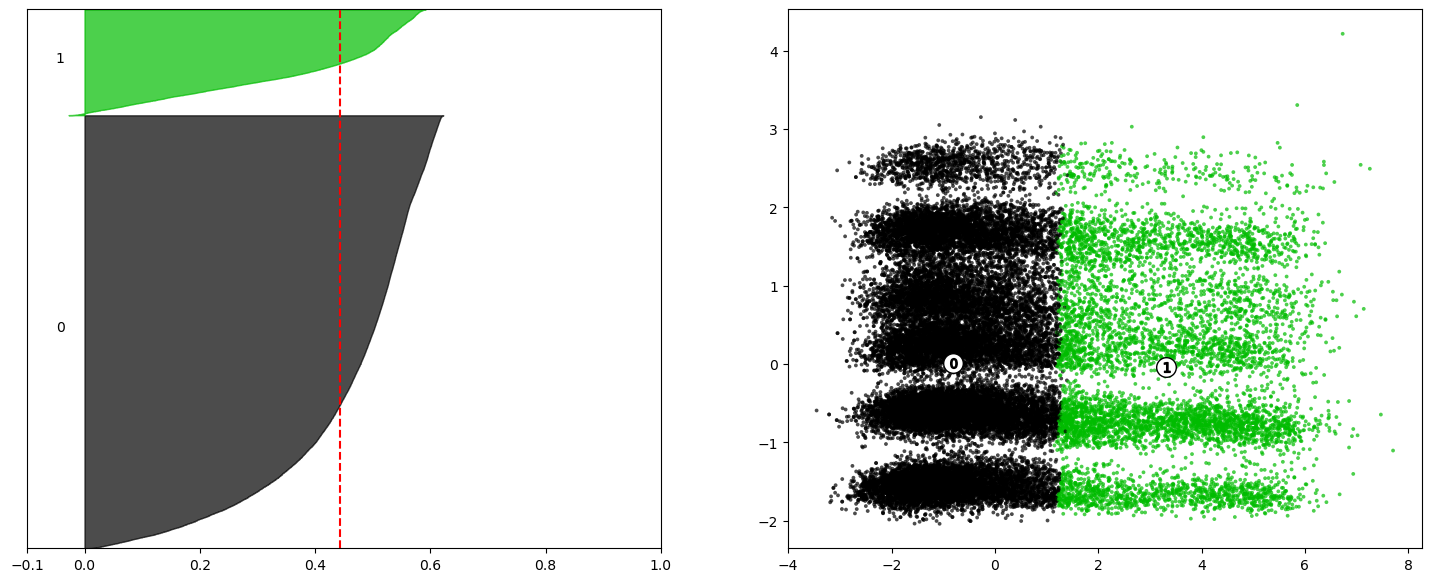

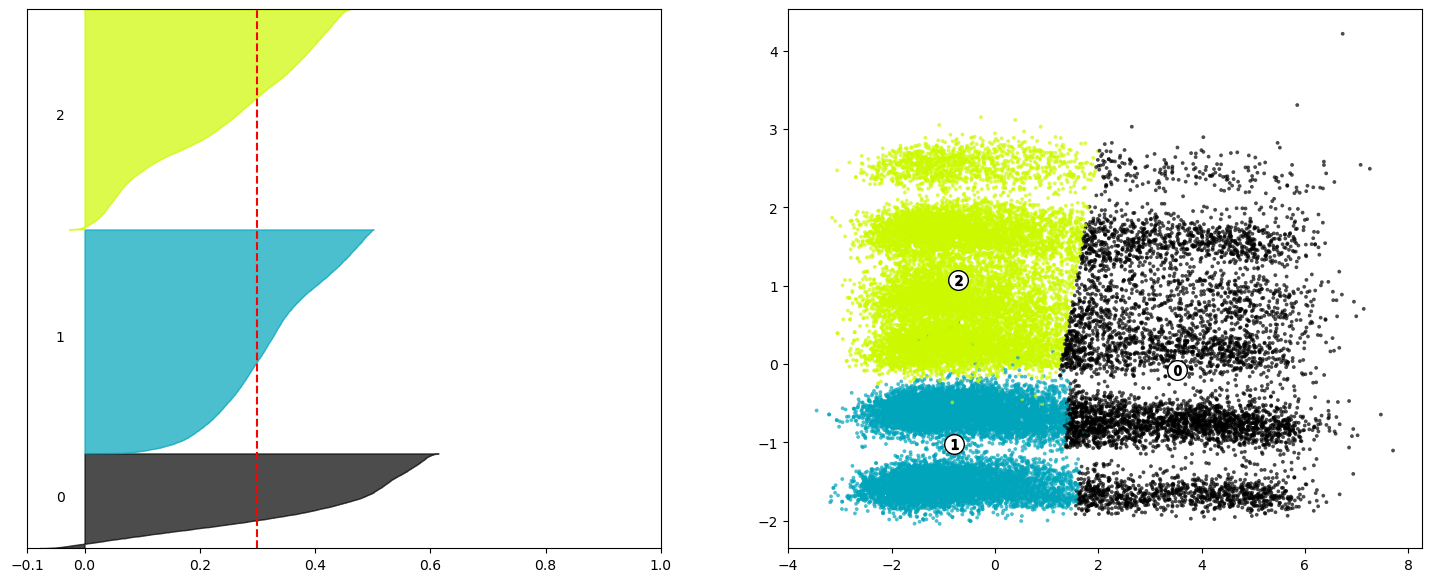

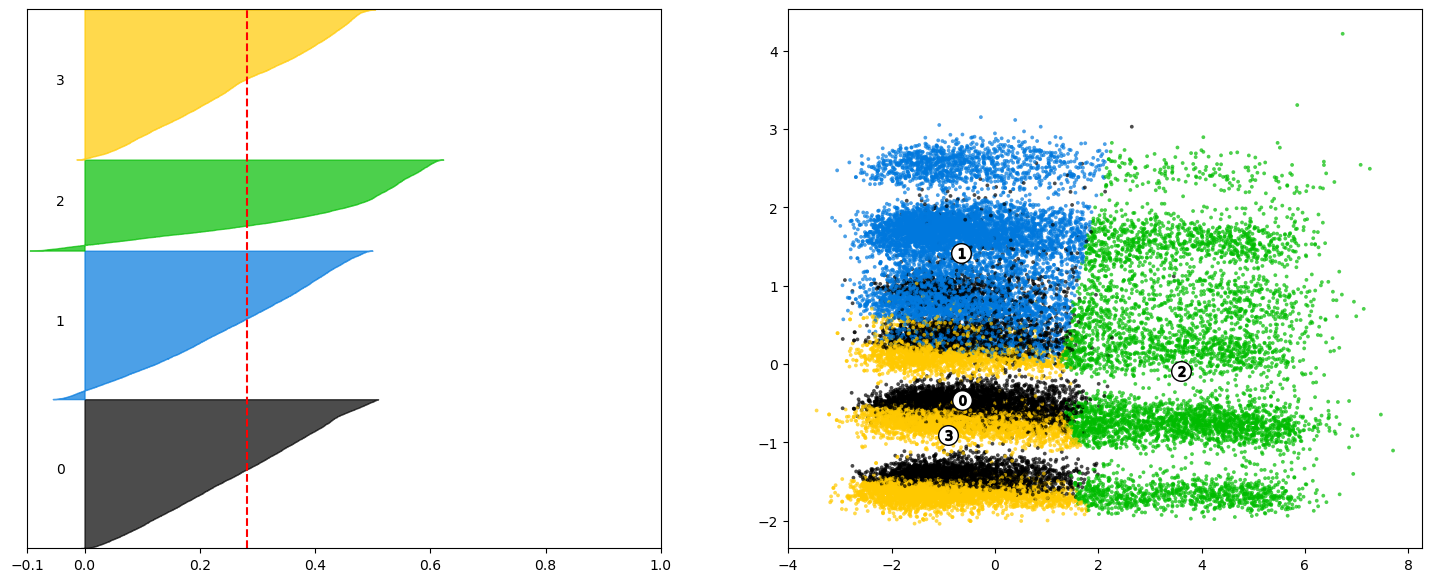

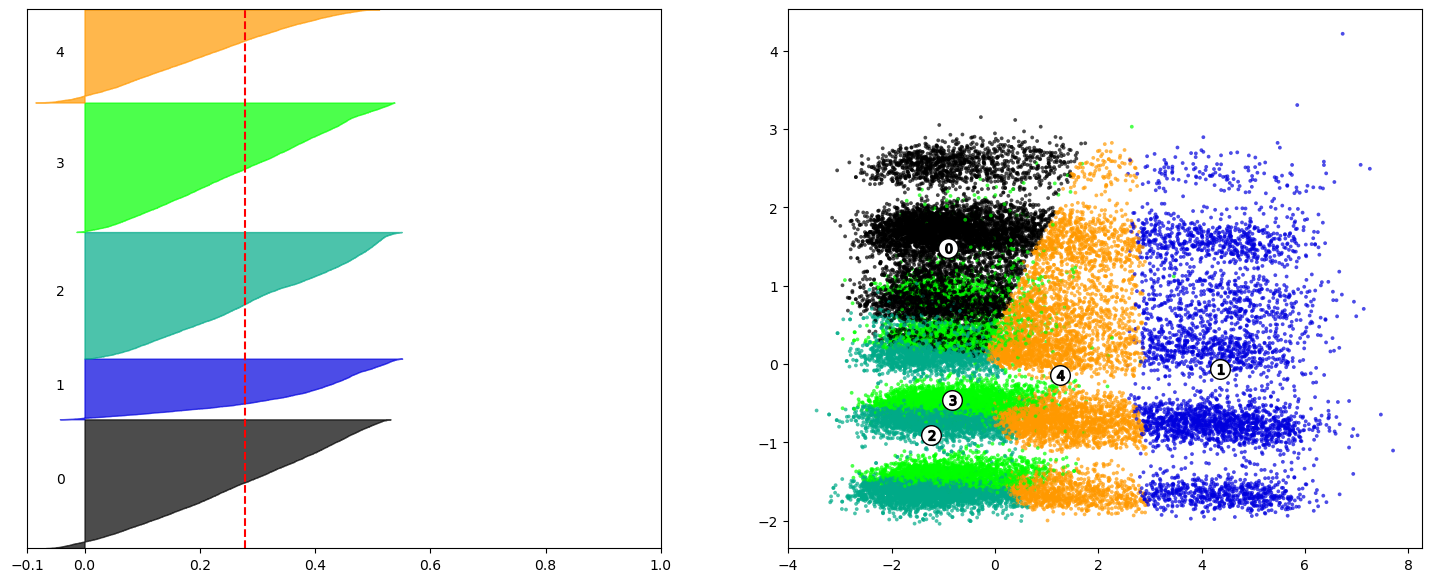

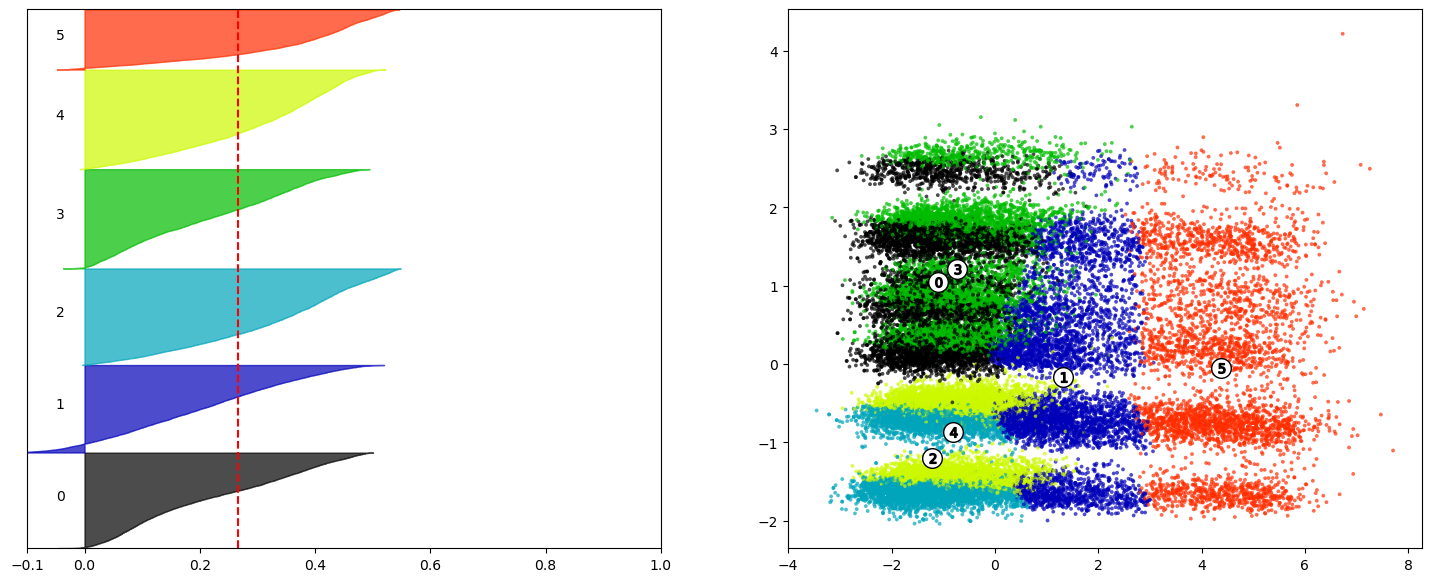

In [11]:
#PCA + KMeans
def perform_pca(X, n_components=3):
    pca = PCA(n_components=n_components)
    transformed_X = pca.fit_transform(X)
    return pd.DataFrame(transformed_X, columns=[f'PC{i+1}' for i in range(n_components)]).to_numpy()

def calculate_silhouette_scores(n_clusters_range, X_pca):
    silhouette_scores = []
    for n_clusters in n_clusters_range:
        kmeans = KMeans(n_clusters=n_clusters, random_state=10)
        labels = kmeans.fit_predict(X_pca)
        avg_silhouette = silhouette_score(X_pca, labels)
        silhouette_scores.append(avg_silhouette)
    return silhouette_scores

def plot_clusters(n_clusters, X_pca):
    kmeans = KMeans(n_clusters=n_clusters, random_state=10)
    labels = kmeans.fit_predict(X_pca)
    avg_silhouette = silhouette_score(X_pca, labels)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X_pca) + (n_clusters + 1) * 10])

    sample_sil_values = silhouette_samples(X_pca, labels)
    y_lower = 10
    for i in range(n_clusters):
        cluster_sil_values = sample_sil_values[labels == i]
        cluster_sil_values.sort()
        size_cluster = cluster_sil_values.shape[0]
        y_upper = y_lower + size_cluster
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_sil_values, facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster, str(i))
        y_lower = y_upper + 10

    ax1.axvline(x=avg_silhouette, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = cm.nipy_spectral(labels.astype(float) / n_clusters)
    ax2.scatter(X_pca[:, 0], X_pca[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k")
    centers = kmeans.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker="o", c="white", alpha=1, s=200, edgecolor="k")

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    plt.show()

X_pca = perform_pca(X_train)
cluster_range = [2, 3, 4, 5, 6]

silhouette_scores = calculate_silhouette_scores(cluster_range, X_pca)
for n_clusters, score in zip(cluster_range, silhouette_scores):
    print(f"For n_clusters = {n_clusters}, The average silhouette_score is: {score}")

for n_clusters in cluster_range:
    plot_clusters(n_clusters, X_pca)



/Users/huyuang/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/huyuang/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


For n_clusters = 2, The average silhouette_score is: 0.34471315145492554
For n_clusters = 3, The average silhouette_score is: 0.3833613395690918
For n_clusters = 4, The average silhouette_score is: 0.3748057186603546
For n_clusters = 5, The average silhouette_score is: 0.3514692187309265
For n_clusters = 6, The average silhouette_score is: 0.3795194923877716


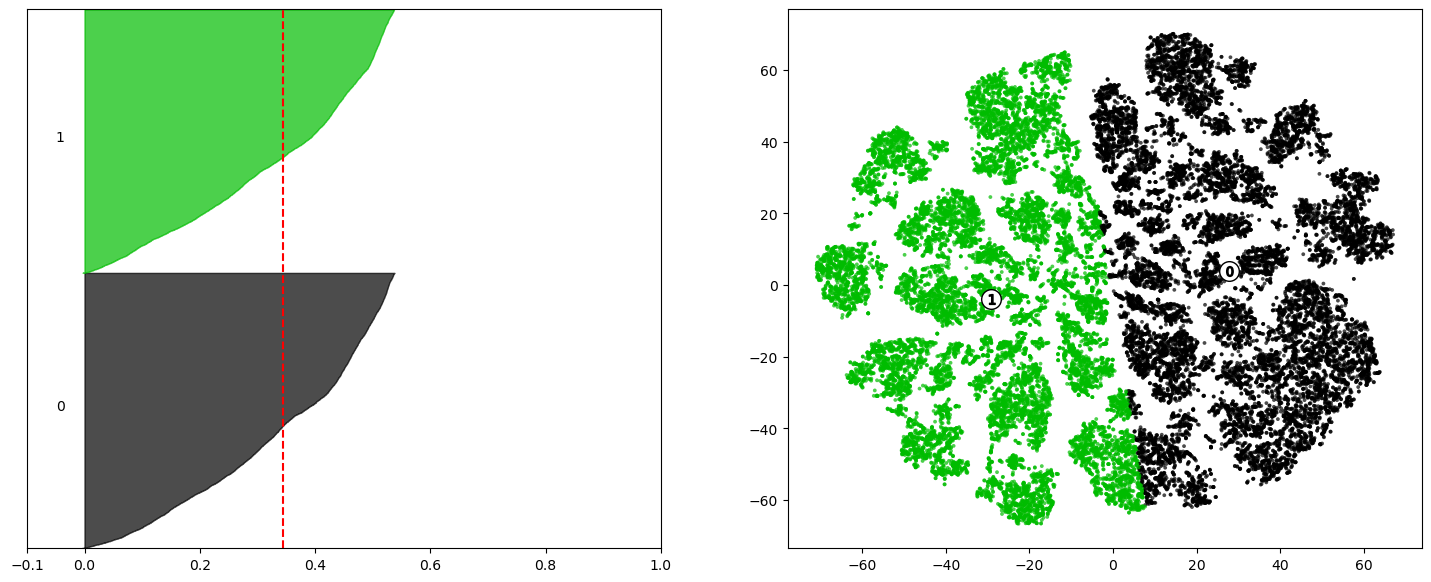

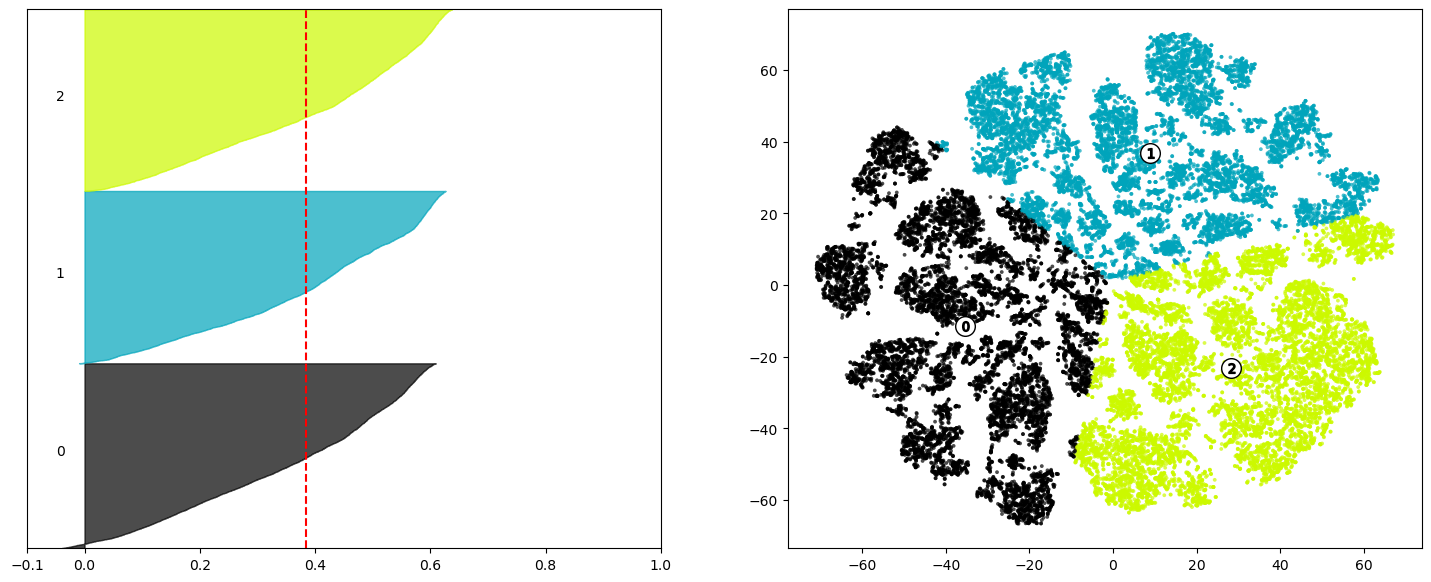

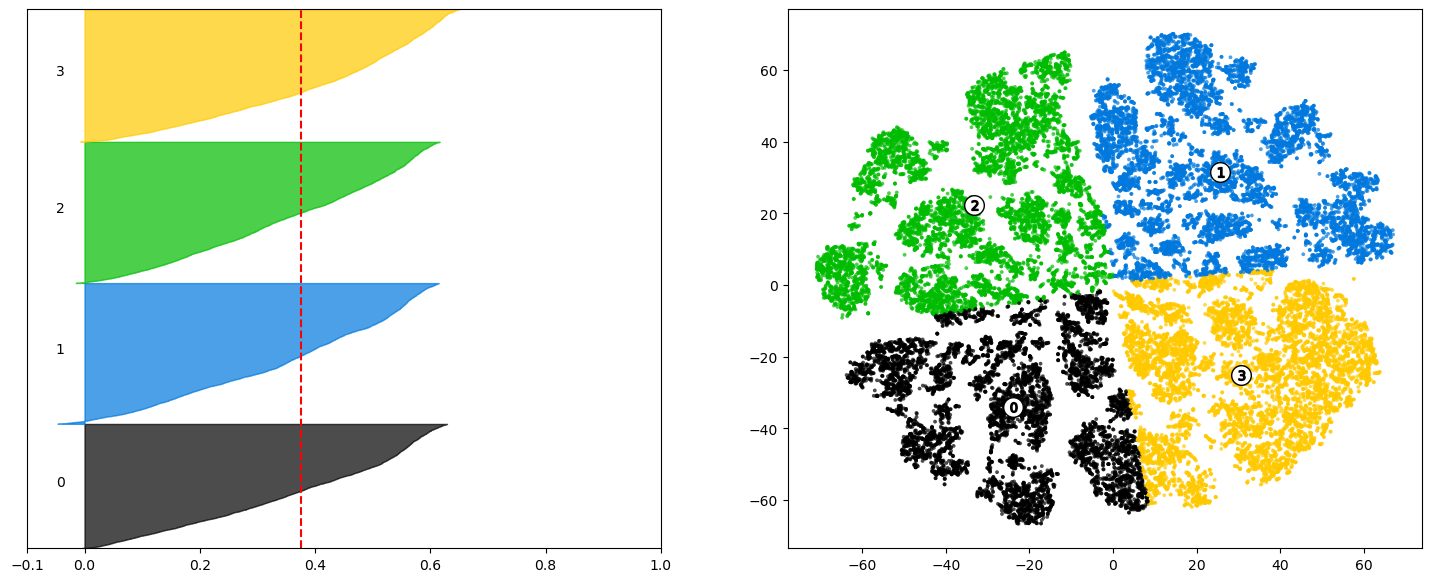

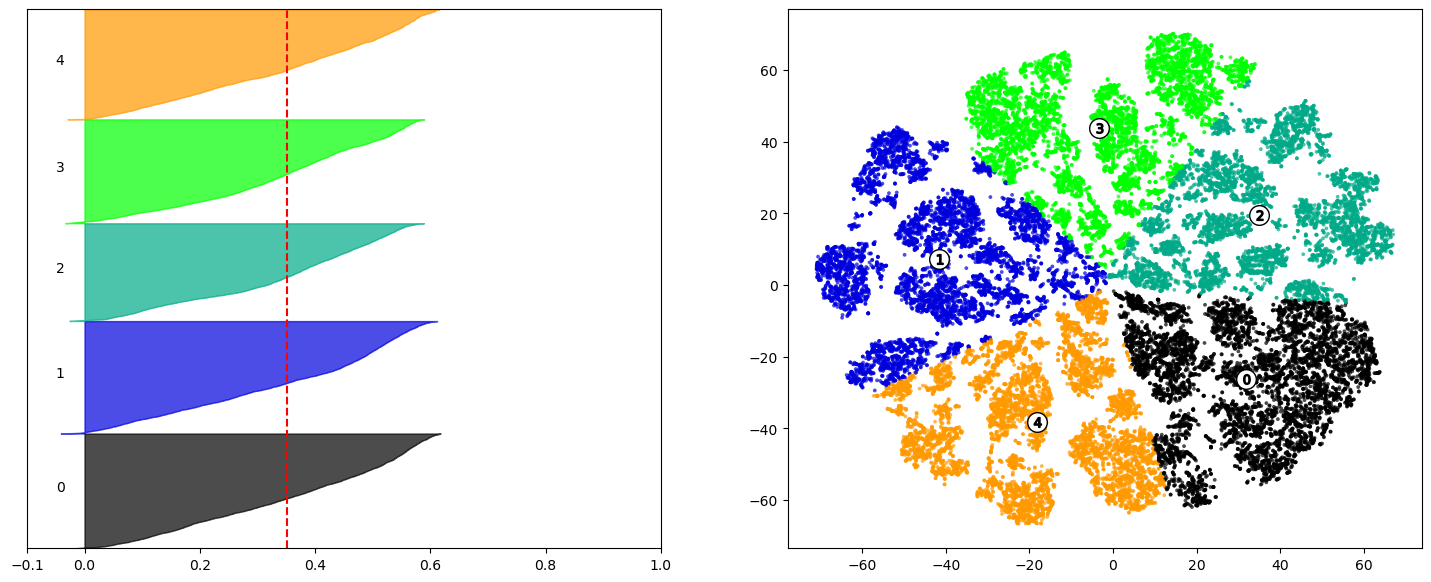

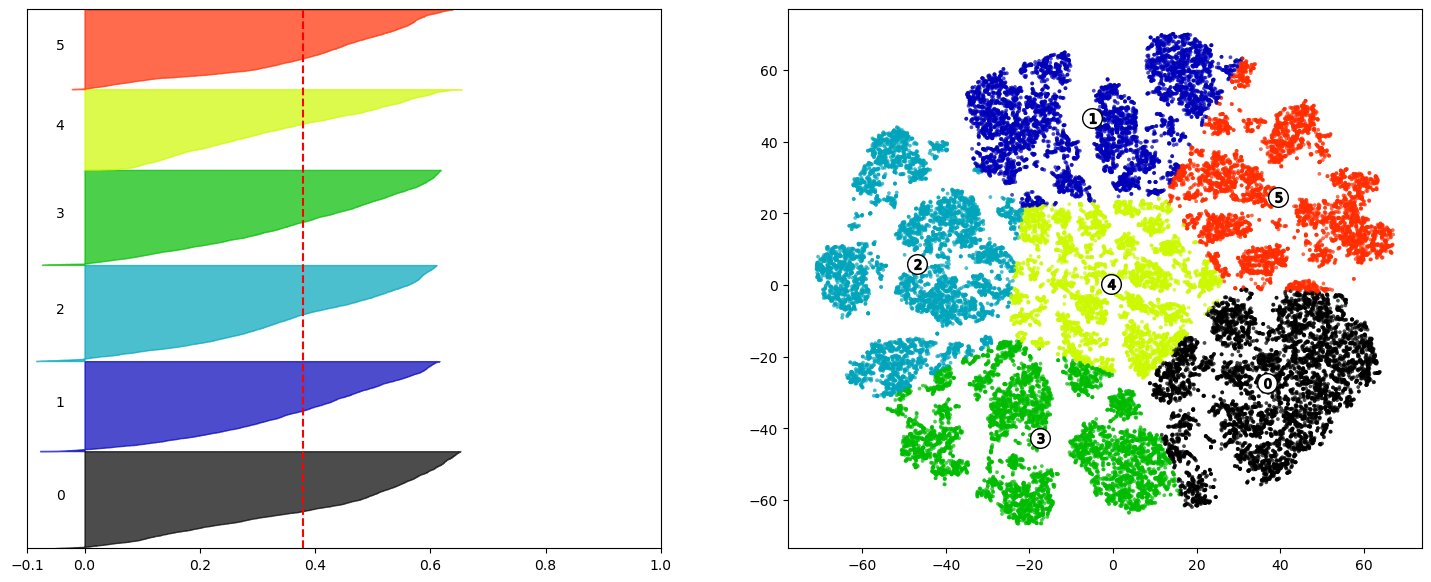

In [12]:
#t-SNE + KMeans
def perform_tsne(X, n_components=2):
    tsne = TSNE(n_components=n_components)
    transformed_X = tsne.fit_transform(X)
    return pd.DataFrame(transformed_X, columns=[f'tSNE{i+1}' for i in range(n_components)]).to_numpy()

def calculate_silhouette_scores(n_clusters_range, X_tsne):
    silhouette_scores = []
    for n_clusters in n_clusters_range:
        kmeans = KMeans(n_clusters=n_clusters, random_state=10)
        labels = kmeans.fit_predict(X_tsne)
        avg_silhouette = silhouette_score(X_tsne, labels)
        silhouette_scores.append(avg_silhouette)
    return silhouette_scores

def plot_clusters(n_clusters, X_tsne):
    kmeans = KMeans(n_clusters=n_clusters, random_state=10)
    labels = kmeans.fit_predict(X_tsne)
    avg_silhouette = silhouette_score(X_tsne, labels)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X_tsne) + (n_clusters + 1) * 10])

    sample_sil_values = silhouette_samples(X_tsne, labels)
    y_lower = 10
    for i in range(n_clusters):
        cluster_sil_values = sample_sil_values[labels == i]
        cluster_sil_values.sort()
        size_cluster = cluster_sil_values.shape[0]
        y_upper = y_lower + size_cluster
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_sil_values, facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster, str(i))
        y_lower = y_upper + 10

    ax1.axvline(x=avg_silhouette, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = cm.nipy_spectral(labels.astype(float) / n_clusters)
    ax2.scatter(X_tsne[:, 0], X_tsne[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k")
    centers = kmeans.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker="o", c="white", alpha=1, s=200, edgecolor="k")

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    plt.show()

X_tsne = perform_tsne(X_train)
cluster_range = [2, 3, 4, 5, 6]

silhouette_scores = calculate_silhouette_scores(cluster_range, X_tsne)
for n_clusters, score in zip(cluster_range, silhouette_scores):
    print(f"For n_clusters = {n_clusters}, The average silhouette_score is: {score}")

for n_clusters in cluster_range:
    plot_clusters(n_clusters, X_tsne)



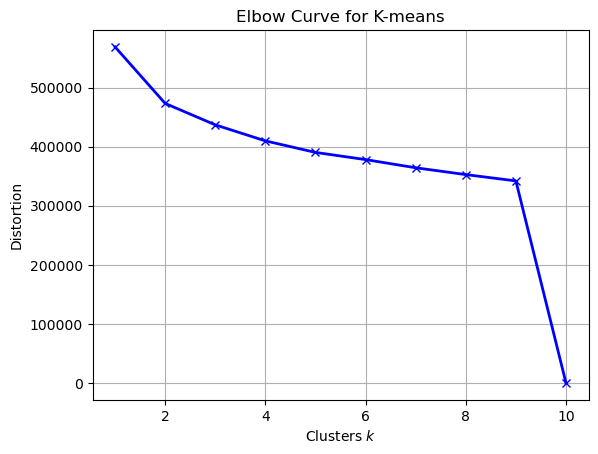

In [13]:
# Plot the Elbow curve to decide the optimal k value
distortions = np.zeros(len(X_train))

for k in range(1, 10):
    kmeans = cluster.KMeans(k)
    kmeans.fit(X_train)
    distortions[k-1] = kmeans.inertia_

# Plot the results.
plt.plot(np.arange(1, 11, 1), distortions[:10], 'b-x', lw = 2)
plt.xlabel(r'Clusters $k$')
plt.ylabel(r'Distortion')
plt.title(r'Elbow Curve for K-means')
plt.grid()
plt.show();

# The slope of Elbow curve indicates that the optimal k value should be 2 or 4 (not obvious at all ...)


In [14]:
#use the result of clustering plus the original data as the input of a classification model. (Since the result of clustering is not ideal, I do not only use clustering as input.)
from typing import Tuple
X_train=pd.DataFrame(X_train)
X_test=pd.DataFrame(X_test)


tss = TSNE(n_components=3)
tss_std = tss.fit_transform(X_train)
tss_std_df = pd.DataFrame(data=tss_std, columns=['tsne comp. 1', 'tsne comp. 2','tsne comp. 3'])
X_tss=tss_std_df


def get_clusters(X_train: pd.DataFrame, X_test: pd.DataFrame, n_clusters: int) -> Tuple[pd.DataFrame, pd.DataFrame]:
    """
    applies k-means clustering to training data to find clusters and predicts them for the test set
    """
    
    clustering = KMeans(n_clusters=n_clusters, random_state=19593397)
    cluster_labels=clustering.fit_predict(X_tss)
    #train_labels = clustering.labels_
    X_train_clstrs = X_train.copy()
    X_train_clstrs['clusters'] = cluster_labels

    # predict labels on the test set
    test_labels = clustering.fit_predict(X_test)
    X_test_clstrs = X_test.copy()
    X_test_clstrs['clusters'] = test_labels
    return X_train_clstrs, X_test_clstrs
X_train_clstrs, X_test_clstrs = get_clusters(X_train, X_test, 4)

X_train=X_train_clstrs.to_numpy().astype('float')
X_test=X_test_clstrs.to_numpy().astype('float')
y_train=y_train.astype('float')
y_test=y_test.astype('float')

print(X_test)




/Users/huyuang/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/huyuang/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[[ 0.41682415 -0.88852946  0.25866389 ... -0.72800258 -0.8972481
   3.        ]
 [-0.53779328 -0.32918654  1.10231207 ...  1.3736215   1.11451894
   0.        ]
 [-0.21958747 -0.87183528  0.4172018  ...  1.3736215   1.11451894
   0.        ]
 ...
 [ 1.37144158 -0.85755505  0.08880184 ... -0.72800258 -0.8972481
   1.        ]
 [ 1.37144158 -0.87906283  0.73427763 ... -0.72800258  1.11451894
   3.        ]
 [ 2.32605902 -0.79810267  1.85536715 ... -0.72800258  1.11451894
   3.        ]]


In [15]:
from typing import Tuple
X_train=pd.DataFrame(X_train)
X_test=pd.DataFrame(X_test)


pca = PCA(n_components=3)
pca_std = pca.fit_transform(X_train)
pca_std_df = pd.DataFrame(data = pca_std, columns = ['PC1', 'PC2','PC3'])
X_pca=pca_std_df


def get_clusters(X_train: pd.DataFrame, X_test: pd.DataFrame, n_clusters: int) -> Tuple[pd.DataFrame, pd.DataFrame]:
    """
    applies k-means clustering to training data to find clusters and predicts them for the test set
    """
    
    clustering = KMeans(n_clusters=n_clusters, random_state=19593397)
    cluster_labels=clustering.fit_predict(X_pca)
    # apply the labels
    #train_labels = clustering.labels_
    X_train_clstrs = X_train.copy()
    X_train_clstrs['clusters'] = cluster_labels

    # predict labels on the test set
    test_labels = clustering.fit_predict(X_test)
    X_test_clstrs = X_test.copy()
    X_test_clstrs['clusters'] = test_labels
    return X_train_clstrs, X_test_clstrs
X_train_clstrs, X_test_clstrs = get_clusters(X_train, X_test, 4)

X_train=X_train_clstrs.to_numpy().astype('float')
X_test=X_test_clstrs.to_numpy().astype('float')
y_train=y_train.astype('float')
y_test=y_test.astype('float')




In [16]:
#Prediction/Classification

# 1st: Logistic Regression
lr = LogisticRegression(solver = 'liblinear')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
acc = metrics.accuracy_score(y_test, y_pred)
y_preb_probs = lr.predict_proba(X_test)
auc = metrics.roc_auc_score(y_test, y_preb_probs,average="weighted", multi_class="ovr")
print('The Logistic Regression accuracy ={:0.1f}%'.format(100*acc))
print("The Logistic Regression auc =:", auc)


LogisticRegression(solver='liblinear')

The Logistic Regression accuracy =50.0%
The Logistic Regression auc =: 0.8863894666666667


In [17]:
#2nd: SVM
svm = SVC(probability=True)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
acc = metrics.accuracy_score(y_test, y_pred)
y_preb_probs = svm.predict_proba(X_test)
auc = metrics.roc_auc_score(y_test, y_preb_probs,average="weighted", multi_class="ovr")
print('Linear SVM validation accuracy = {:0.1f}%'.format(100*acc))
print('Linear SVM auc =', auc)

SVC(probability=True)

Linear SVM validation accuracy = 56.2%
Linear SVM auc = 0.9200060444444443


In [18]:
# 3rd: Single Decision Tree
sdt = tree.DecisionTreeClassifier(criterion='entropy',max_depth=10, min_samples_leaf=8)
sdt = sdt.fit(X_train, y_train)
y_pred = sdt.predict(X_test)
acc = metrics.accuracy_score(y_test, y_pred)
y_preb_probs = sdt.predict_proba(X_test)
auc = metrics.roc_auc_score(y_test, y_preb_probs,average="weighted", multi_class="ovr")
print('Single Decision Tree accuracy = {:0.1f}%'.format(100*acc))
print("Single Decision Tree auc =",auc)

Single Decision Tree accuracy = 50.8%
Single Decision Tree auc = 0.8715584444444444


In [19]:
# 4th: Random Forest
rf = RandomForestClassifier(criterion='gini',max_depth=20, min_samples_leaf=8)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
acc = np.sum(y_pred == y_test)/len(y_pred)
y_preb_probs = rf.predict_proba(X_test)
auc = metrics.roc_auc_score(y_test, y_preb_probs,average="weighted", multi_class="ovr")
print('Rando Forest accuracy = {:0.1f}%'.format(100*acc))
print("Random Forest auc =",auc)

RandomForestClassifier(max_depth=20, min_samples_leaf=8)

Rando Forest accuracy = 56.4%
Random Forest auc = 0.9242903555555556


In [20]:
# 5th: Adaboosting
ab = AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth=10), algorithm="SAMME", n_estimators=100, learning_rate=1)
ab.fit(X_train, y_train)
y_pred = ab.predict(X_test)
acc = np.sum(y_pred == y_test)/len(y_pred)
y_preb_probs = ab.predict_proba(X_test)
auc = metrics.roc_auc_score(y_test, y_preb_probs,average="weighted", multi_class="ovr")
print('Adaboosting accuracy = {:0.1f}%'.format(100*acc))
print("Adaboosting auc =",auc)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=10),
                   learning_rate=1, n_estimators=100)

Adaboosting accuracy = 52.7%
Adaboosting auc = 0.905960888888889


In [21]:
# 6th: Perceptron 
perceptron = Perceptron(tol=1e-3, random_state=0)
perceptron.fit(X_train,y_train)
acc = perceptron.score(X_test, y_test)
y_preb_probs = perceptron._predict_proba_lr(X_test)
auc = metrics.roc_auc_score(y_test, y_preb_probs,average="weighted", multi_class="ovr")
print('Perceptron accuracy = {:0.1f}%'.format(100*acc))
print("Perceptron auc =",auc)

Perceptron()

Perceptron accuracy = 32.3%
Perceptron auc = 0.7929297333333333


In [22]:
# 7th: MLP / Deep learning
mlp = MLPClassifier(hidden_layer_sizes=(10,10,), max_iter=500, activation='identity')
mlp.fit(X_train,y_train)
y_pred = mlp.predict(X_test)
acc = mlp.score(X_test, y_test)
y_preb_probs = mlp.predict_proba(X_test)
auc = metrics.roc_auc_score(y_test, y_preb_probs,average="weighted", multi_class="ovr")
print('MLP accuracy = {:0.1f}%'.format(100*acc))
print("Perceptron auc =",auc)

MLPClassifier(activation='identity', hidden_layer_sizes=(10, 10), max_iter=500)

MLP accuracy = 52.5%
Perceptron auc = 0.9036467111111111


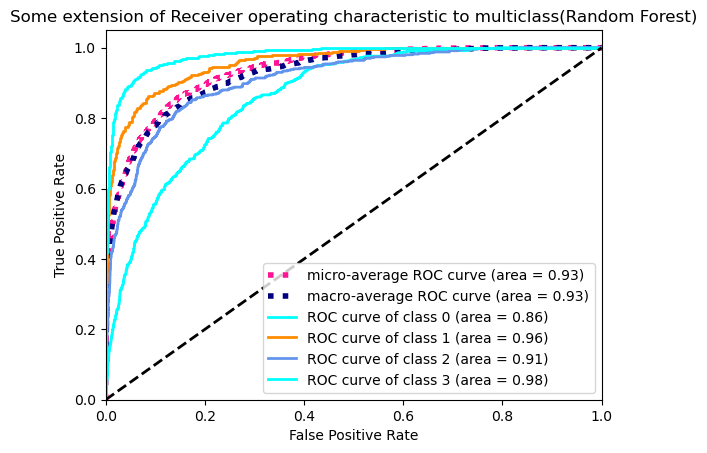

In [35]:
# Binarize the labels
y_train = label_binarize(y_train, classes=[0, 1, 2, 3])
y_test = label_binarize(y_test, classes=[0, 1, 2, 3])
n_classes = y_train.shape[1]
lw = 2

# Train the RandomForestClassifier
classifier = RandomForestClassifier(criterion='gini', max_depth=20, min_samples_leaf=8, n_jobs=-1, random_state=42)
classifier.fit(X_train, y_train)

# Get the probability estimates for each class
y_score = classifier.predict_proba(X_test)

## Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[i][:, 1])
    roc_auc[i] = calculate_auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
y_score_concat = np.concatenate([y_score[i][:, 1].reshape(-1, 1) for i in range(n_classes)], axis=1)
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score_concat.ravel())
roc_auc["micro"] = calculate_auc(fpr["micro"], tpr["micro"])

# Aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Interpolate all ROC curves at the aggregate false positive rates
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Average the interpolated true positive rates and compute AUC
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = calculate_auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass(Random Forest)")
plt.legend(loc="lower right")
plt.show();


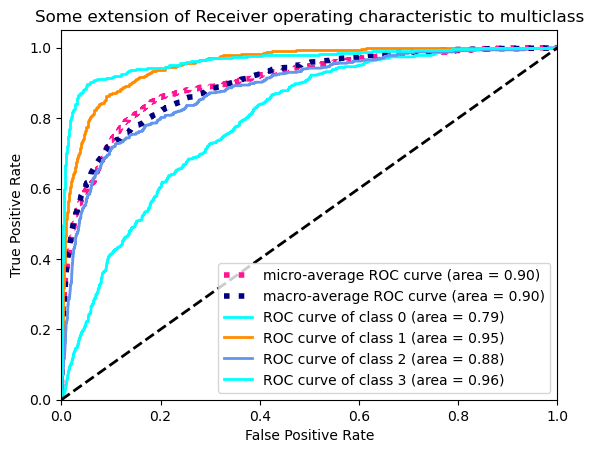

In [28]:
#Plot ROC curves
# Binarize the labels
y_train = label_binarize(y_train, classes=[0, 1, 2, 3])
y_test = label_binarize(y_test, classes=[0, 1, 2, 3])
n_classes = y_train.shape[1]
lw = 2

# Train the OneVsRestClassifier with an SVM estimator
classifier = OneVsRestClassifier(SVC(probability=True))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = calculate_auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = calculate_auc(fpr["micro"], tpr["micro"])

# Aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Interpolate all ROC curves at the aggregate false positive rates
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Average the interpolated true positive rates and compute AUC
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = calculate_auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show();


Text(0.5, 0, 'x')

Text(0, 0.5, 'y')

Text(0.5, 1.0, 'y(genre) against x(loudness)')

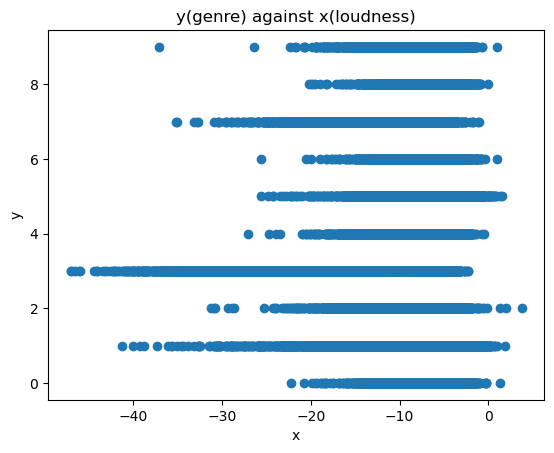

In [ ]:
# For extra credit:
plt.scatter(data[:,8].reshape(1,-1),y,marker='o')
plt.xlabel("x")
plt.ylabel('y')
plt.title('y(genre) against x(loudness)')
plt.show()

Text(0.5, 0, 'x')

Text(0, 0.5, 'y')

Text(0.5, 1.0, 'y(genre) against x(popularity)')

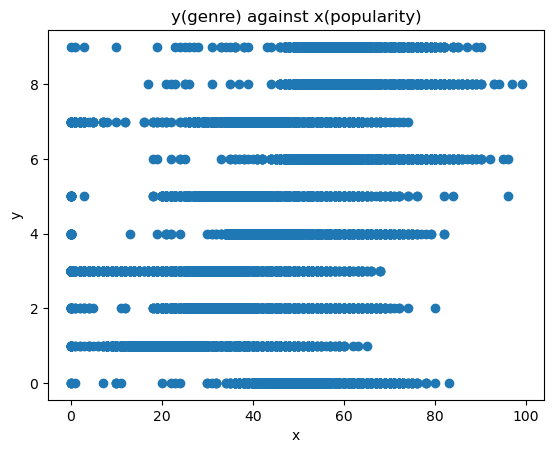

In [ ]:
# For extra credit:
plt.scatter(data[:,0].reshape(1,-1),y,marker='o')
plt.xlabel("x")
plt.ylabel('y')
plt.title('y(genre) against x(popularity)')
plt.show()

Text(0.5, 0, 'x')

Text(0, 0.5, 'y')

Text(0.5, 1.0, 'x(popularity) against x(loudness)')

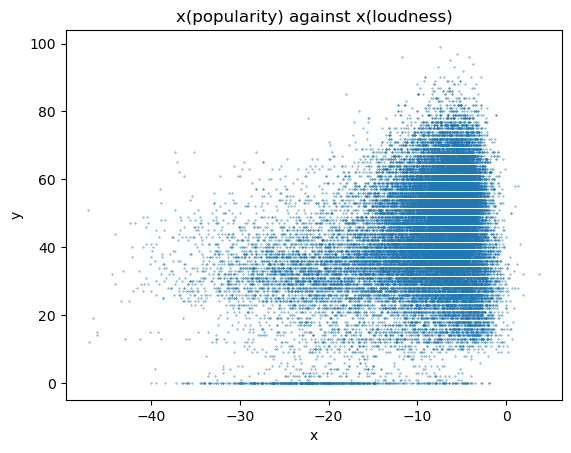

In [ ]:
# For extra credit:
plt.scatter(data[:,8].reshape(1,-1),data[:,0],marker='o',s=0.1)
plt.xlabel("x")
plt.ylabel('y')
plt.title('x(popularity) against x(loudness)')
plt.show()